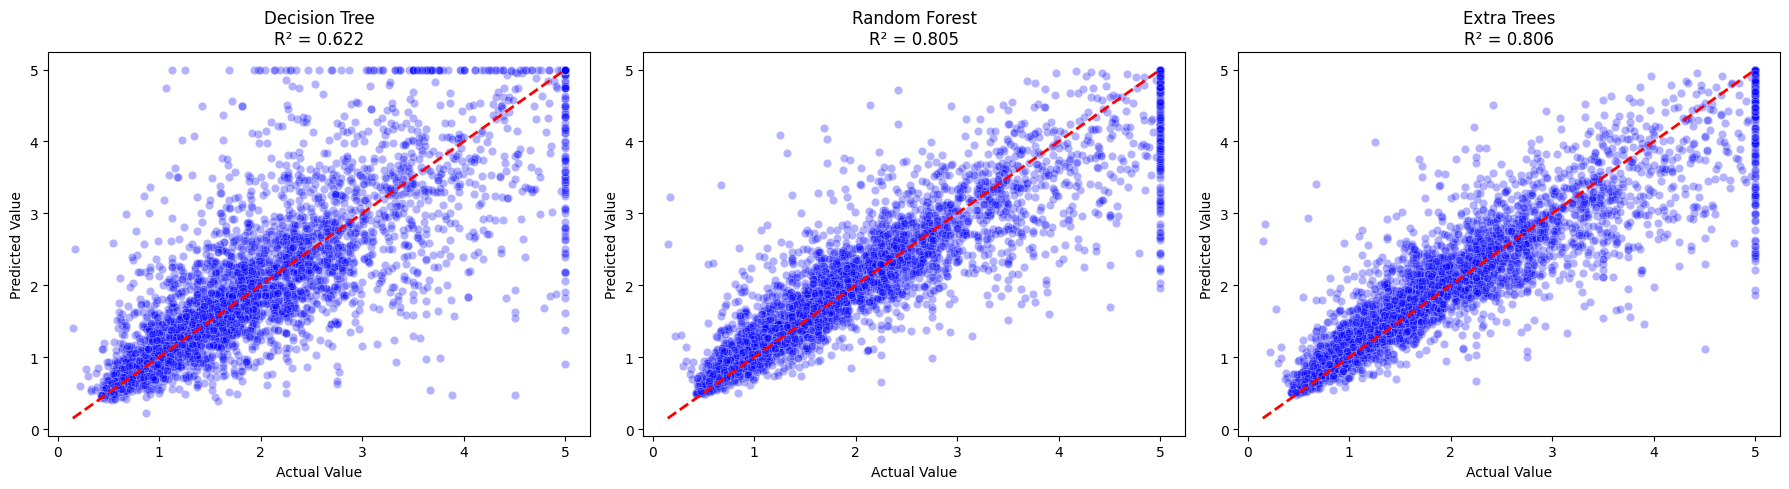


 Model Performance Comparison


,Model,MSE,RMSE,R2 Score
2,Extra Trees,0.253904,0.503889,0.806241
1,Random Forest,0.255368,0.505340,0.805123
0,Decision Tree,0.495235,0.703729,0.622076


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset (California Housing)
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedianHouseValue')

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

# Train & Evaluate
results = []
plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2 Score": r2})

    # Plot - Predicted vs Actual
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title(f'{name}\nR² = {r2:.3f}')

plt.tight_layout()
plt.show()

# Compare Models
results_df = pd.DataFrame(results)
print("\n Model Performance Comparison")
display(results_df.sort_values(by="R2 Score", ascending=False))

## Model Comparison & Analysis

### Accuracy and Generalization
* **Decision Tree:** This model serves as our baseline but demonstrates the lowest accuracy (lowest $R^2$) and highest error rates. The high error on the test set, despite likely high performance on training data, indicates poor **generalization**. The model has likely **overfitted**, capturing noise in the training data rather than the underlying trend.
* **Ensemble Methods (Random Forest & Extra Trees):** Both ensemble models significantly outperform the single decision tree. They exhibit lower MSE/RMSE and higher $R^2$ scores, indicating a much stronger ability to generalize to new, unseen data. By aggregating predictions from multiple trees, these models successfully smooth out irregularities and focus on the true signal.

### Model Behavior: Single Tree vs. Ensemble Methods
The fundamental difference in performance stems from how these models handle variance and bias:

* **Single Tree (High Variance):** A single Decision Tree is highly sensitive to the specific data it is trained on. Small changes in the training set can result in a completely different tree structure. This high variance leads to overfitting, where the model "memorizes" the specific dataset rather than learning the general rules.
* **Random Forest (Variance Reduction via Bagging):** Random Forest addresses the single tree's weakness using **Bootstrap Aggregation (Bagging)**. It builds hundreds of decorrelated trees—each trained on a random subset of data—and averages their predictions. This averaging process cancels out the individual errors of separate trees, drastically reducing variance and resulting in a more robust and stable model.
* **Extra Trees (Variance Reduction via Randomization):** The Extra Trees (Extremely Randomized Trees) regressor takes randomization a step further. Unlike Random Forest, which searches for the *best* split point for each feature, Extra Trees chooses split points at **random**. This aggressive randomization further reduces variance and computational cost, making it highly effective for noisy datasets and often faster to train than standard Random Forests.